 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna() #(inplace=True) 

In [6]:
#validate nulls were dropped
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

In [10]:
#validate nulls were dropped 
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)

sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
sp500_history_df.sort_values("Date")
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
# remove $ so object can be converted to a float
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [15]:
# convert 'Close' to float
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [16]:
# Calculate Daily Returns
sp500_returns = sp500_history_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close": "S&P 500 Returns"})
sp500_returns.head()

,S&P 500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Concat returns DataFrames
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

In [20]:
combined_df= combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

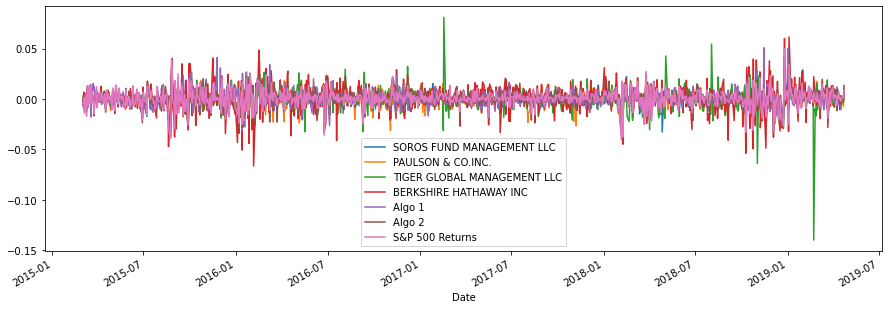

In [21]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns from 2015 - 2019'}, xlabel='Date'>

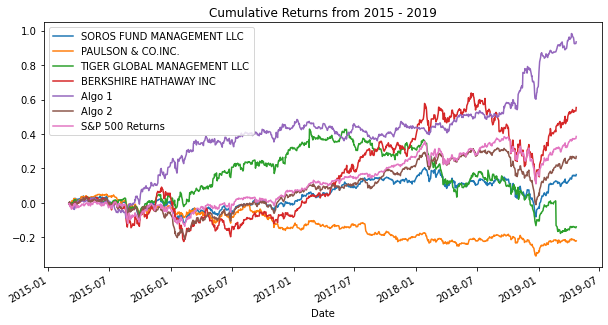

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns from 2015 - 2019")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

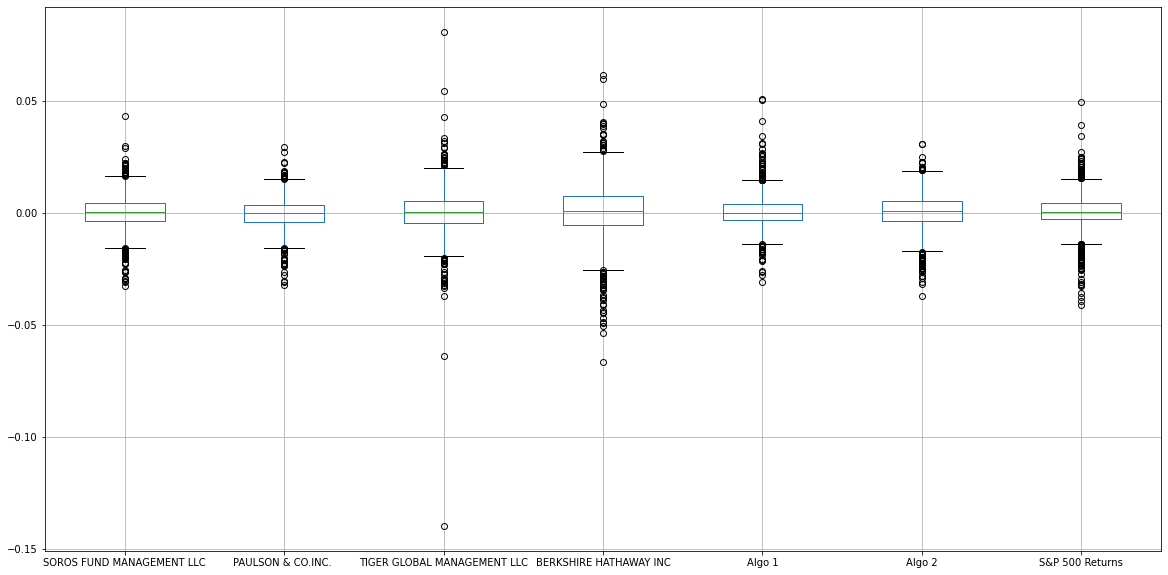

In [111]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Returns                0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [27]:
combined_df_std = combined_df_std * np.sqrt(252)
combined_df_std.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

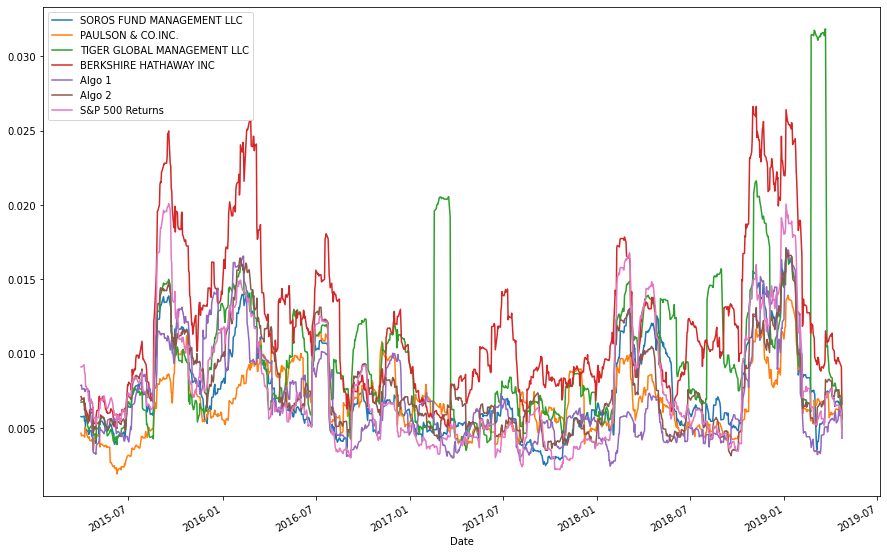

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df_std.rolling(window=21).cov()
rolling_std
                        
# Plot the rolling standard deviation
#rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns')
combined_df.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

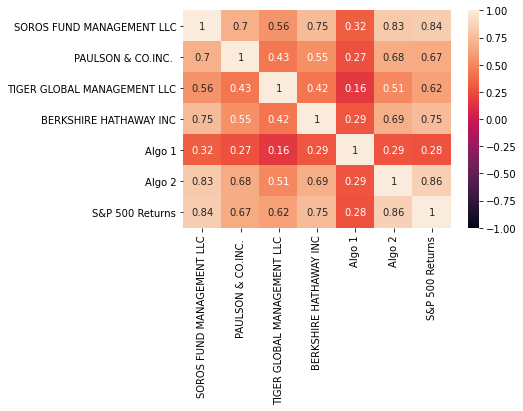

In [29]:
# Calculate the correlation
correlation = combined_df.corr()


# Display the correlation matrix
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Soros Fund Mgmt 60 Day Rolling Beta'}, xlabel='Date'>

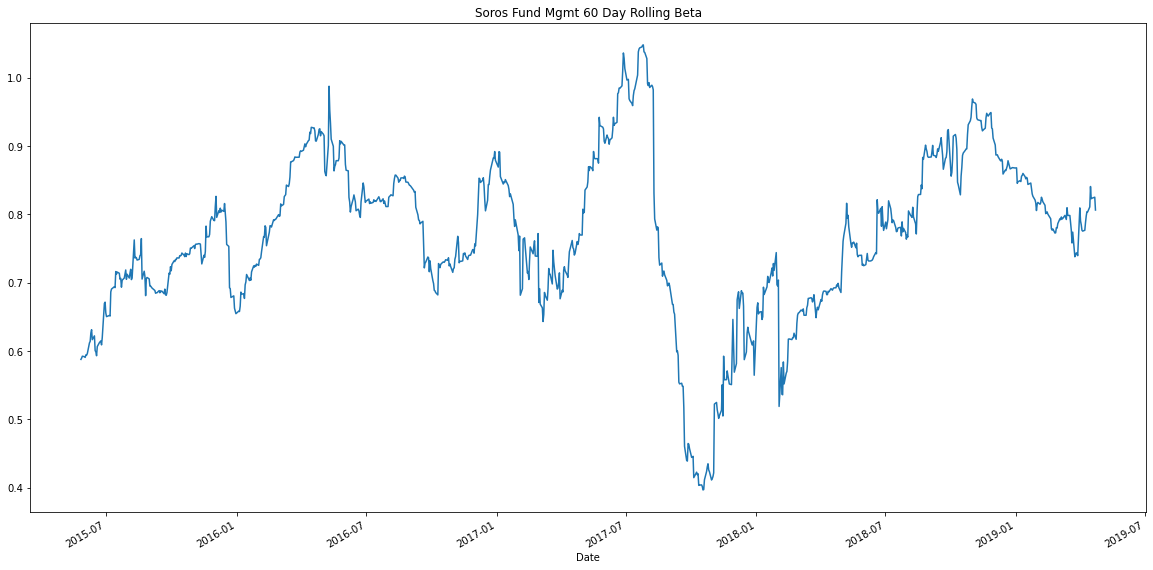

In [30]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500 Returns'])
covariance

# Calculate variance of S&P 500

variance = combined_df['S&P 500 Returns'].rolling(window=60).var()
variance

# Computing beta
soros_beta = covariance / variance

# Plot beta trend
soros_beta.plot(figsize=(20,10), title="Soros Fund Mgmt 60 Day Rolling Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

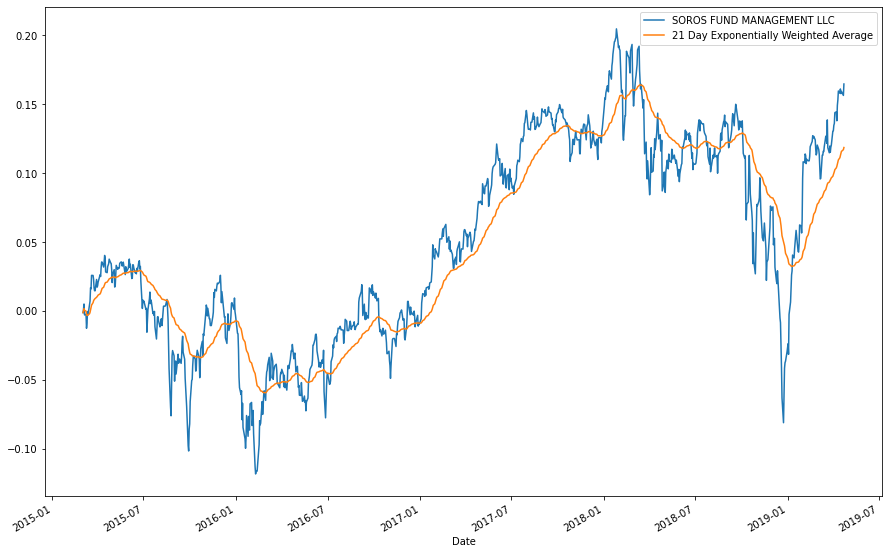

In [31]:
# Use `ewm` to calculate the rolling window
ax = cumulative_returns['SOROS FUND MANAGEMENT LLC'].plot()
cumulative_returns['SOROS FUND MANAGEMENT LLC'].ewm(halflife=21).mean().plot(figsize=(15,10)) 
ax.legend(['SOROS FUND MANAGEMENT LLC', '21 Day Exponentially Weighted Average'])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Returns                0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

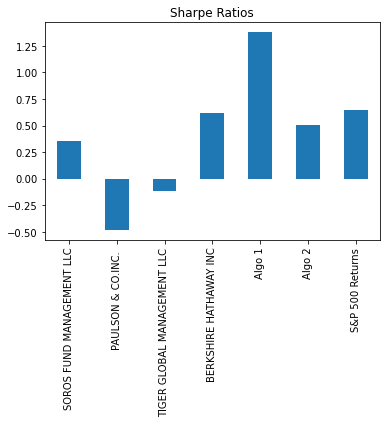

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [34]:
# Reading data from 1st stock
TDOC_data = Path("Resources/TDOC.csv")
TDOC_df = pd.read_csv(TDOC_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
TDOC_df.sort_index(inplace=True)

TDOC_df.head()

,Close
Date,
2015-07-01 16:00:00,28.50
2015-07-02 16:00:00,28.00
2015-07-06 16:00:00,26.69
2015-07-07 16:00:00,27.01
2015-07-08 16:00:00,26.25


In [35]:
# Reading data from 2nd stock
TSLA_data = Path("Resources/TSLA .csv")
TSLA_df = pd.read_csv(TSLA_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
TSLA_df.sort_index(inplace=True)

TSLA_df.head()

,Close
Date,
2015-03-02 16:00:00,39.47
2015-03-03 16:00:00,39.91
2015-03-04 16:00:00,40.49
2015-03-05 16:00:00,40.13
2015-03-06 16:00:00,38.78


In [36]:
# Reading data from 3rd stock
SHOP_data = Path("Resources/SHOP.csv")
SHOP_df = pd.read_csv(SHOP_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
SHOP_df.sort_index(inplace=True)

SHOP_df.head()

,Close
Date,
2015-05-21 16:00:00,25.68
2015-05-22 16:00:00,28.31
2015-05-26 16:00:00,29.65
2015-05-27 16:00:00,27.50
2015-05-28 16:00:00,27.45


In [37]:
# Combine all stocks in a single DataFrame
combined_df2 = pd.concat([TDOC_df, TSLA_df, SHOP_df], axis="columns", join="inner")
combined_df2.sort_index(inplace=True)
combined_df2.head()

,Close,Close,Close
Date,,,
2015-07-01 16:00:00,28.50,53.83,31.11
2015-07-02 16:00:00,28.00,56.00,31.31
2015-07-06 16:00:00,26.69,55.94,30.53
2015-07-07 16:00:00,27.01,53.58,30.76
2015-07-08 16:00:00,26.25,50.99,29.19


In [38]:
# Reset Date index
combined_df2.index = combined_df2.index.date
combined_df2.head()

,Close,Close,Close
2015-07-01,28.50,53.83,31.11
2015-07-02,28.00,56.00,31.31
2015-07-06,26.69,55.94,30.53
2015-07-07,27.01,53.58,30.76
2015-07-08,26.25,50.99,29.19


In [39]:
# Reorganize portfolio data by having a column per symbol
combined_df2.columns = ['TDOC', 'TSLA', 'SHOP']
combined_df2.head()

,TDOC,TSLA,SHOP
2015-07-01,28.50,53.83,31.11
2015-07-02,28.00,56.00,31.31
2015-07-06,26.69,55.94,30.53
2015-07-07,27.01,53.58,30.76
2015-07-08,26.25,50.99,29.19


In [40]:
# Calculate daily returns
daily_returns = combined_df2.pct_change()

# Drop NAs
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns.head()

,TDOC,TSLA,SHOP
2015-07-02,-0.017544,0.040312,0.006429
2015-07-06,-0.046786,-0.001071,-0.024912
2015-07-07,0.011990,-0.042188,0.007534
2015-07-08,-0.028138,-0.048339,-0.051040
2015-07-09,0.015619,0.011571,-0.004454


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

2015-07-02    0.009732
2015-07-06   -0.024256
2015-07-07   -0.007555
2015-07-08   -0.042506
2015-07-09    0.007579
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [75]:
# Join your returns DataFrame to the original returns DataFrame
master_df = pd.concat([portfolio_returns, combined_df], axis="columns", join="outer")
master_df.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
2015-03-03 00:00:00,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04 00:00:00,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05 00:00:00,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06 00:00:00,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09 00:00:00,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [101]:
#Rename Columns
master_df.columns = ['AB Portfolio', 'SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500 Returns']
master_df.head()

,AB Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
2015-07-02,0.009732,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000308
2015-07-06,-0.024256,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003862
2015-07-07,-0.007555,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081
2015-07-08,-0.042506,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653
2015-07-09,0.007579,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262


In [94]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
master_df.dropna(inplace=True)
master_df.head()

,AB Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
2015-07-02,0.009732,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000308
2015-07-06,-0.024256,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003862
2015-07-07,-0.007555,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081
2015-07-08,-0.042506,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653
2015-07-09,0.007579,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262


In [95]:
#validate that nulls were dropped
master_df.isnull().sum()

AB Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 Returns                0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [96]:
# Calculate the annualized `std`
master_std = master_df.std() * np.sqrt(252)
master_std.sort_values(inplace=True)
master_std

PAULSON & CO.INC.              0.115999
Algo 1                         0.125929
SOROS FUND MANAGEMENT LLC      0.129590
Algo 2                         0.136964
S&P 500 Returns                0.140007
TIGER GLOBAL MANAGEMENT LLC    0.166183
BERKSHIRE HATHAWAY INC         0.214473
AB Portfolio                   0.366042
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

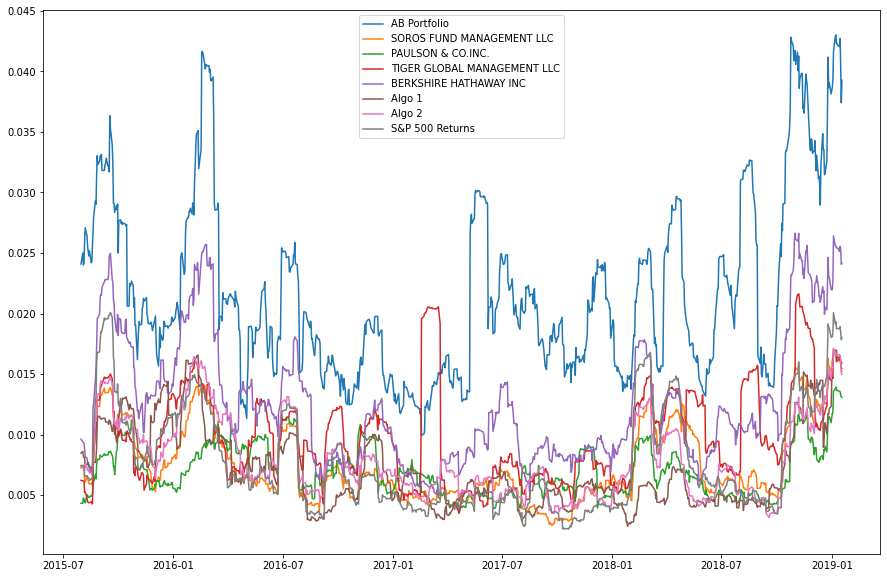

In [97]:
# Calculate rolling standard deviation
rolling_std2 = master_std.rolling(window=21).cov()
rolling_std2

# Plot rolling standard deviation
master_df.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

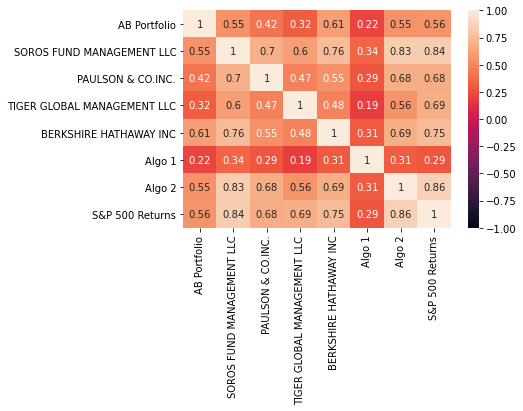

In [98]:
# Calculate and plot the correlation
correlation2 = master_df.corr()
sns.heatmap(correlation2, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'AB Portfolio 60 Day Rolling Beta'}>

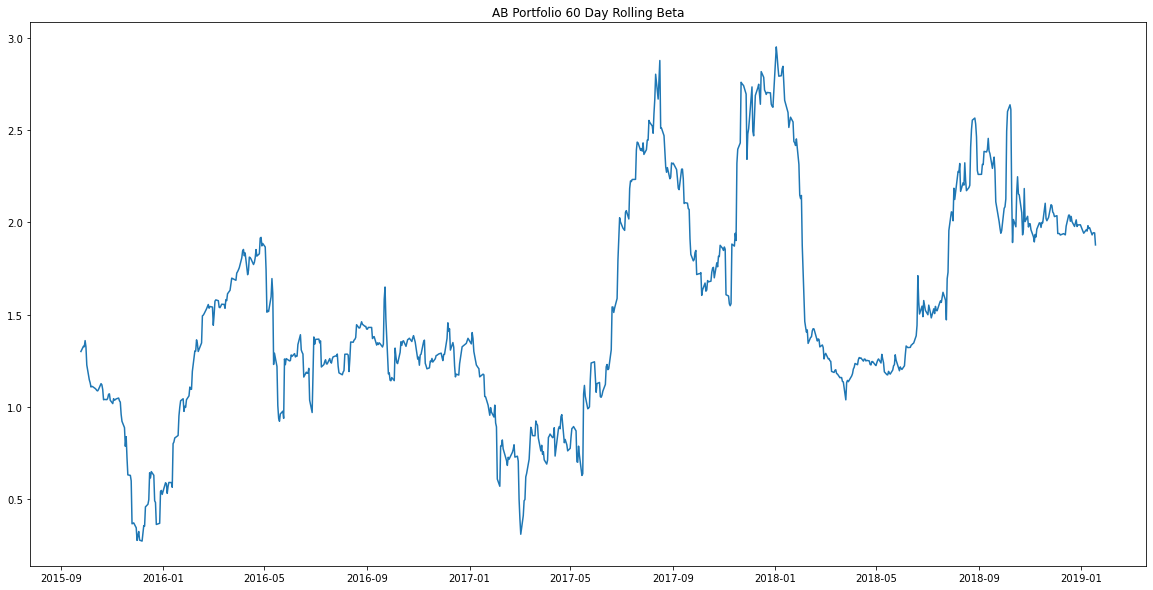

In [107]:
# Calculate and plot Beta
covariance2 = master_df['AB Portfolio'].rolling(window=60).cov(master_df['S&P 500 Returns'])
covariance2

#Calculate variance of S&P 500

variance2 = master_df['S&P 500 Returns'].rolling(window=60).var()
variance2

# Computing beta
my_beta = covariance2 / variance2
my_beta
# Plot beta trend
my_beta.plot(figsize=(20,10), title="AB Portfolio 60 Day Rolling Beta")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [108]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = (master_df.mean() * 252) / (master_df.std() * np.sqrt(252))
sharpe_ratios2

AB Portfolio                   1.011848
SOROS FUND MANAGEMENT LLC      0.174777
PAULSON & CO.INC.             -0.698330
TIGER GLOBAL MANAGEMENT LLC    0.070972
BERKSHIRE HATHAWAY INC         0.471585
Algo 1                         1.452792
Algo 2                         0.353646
S&P 500 Returns                0.579071
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for My Portfolio'}>

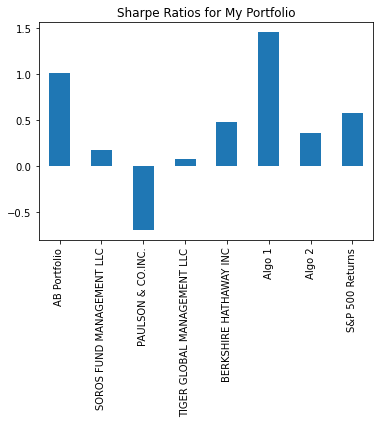

In [109]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind="bar", title="Sharpe Ratios for My Portfolio")

### How does your portfolio do?

Write your answer here!